In [22]:
import requests 
import pandas as pd 
pd.set_option('display.max_columns', None)  # To display all columns
pd.set_option('display.max_rows', 500)      # To display only 500 rows
server = "seffaflik.epias.com.tr"
root_directory = "/electricity-service"
scheme = "https"
endpoint = "/v1/generation/data/realtime-generation"
# Combine components to create the full URL
url = f"{scheme}://{server}{root_directory}{endpoint}"

In [29]:
request_payload = {
    "endDate":"2019-05-01T00:00:00+03:00",
    "startDate": "2019-01-01T00:00:00+03:00"
}

In [31]:
request_payload = {
    "endDate":"2019-05-01T00:00:00+03:00",
    "startDate": "2019-01-01T00:00:00+03:00"
}
try:
    response = requests.post(url, json=request_payload)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        print("Request successful")
        print("Response content:")
        print(response.json()) 
    else:
        print(f"Request failed with status code {response.status_code}")

except requests.RequestException as e:
    print(f"Request error: {e}")
df = pd.DataFrame(response.json()['items'])
print(df)

Request successful
Response content:
{'items': [{'date': '2019-01-01T00:00:00+03:00', 'hour': '00:00', 'total': 27399.64, 'naturalGas': 4792.98, 'dammedHydro': 4958.01, 'lignite': 5348.92, 'river': 2103.32, 'importCoal': 5434.72, 'wind': 2936.84, 'sun': 0, 'fueloil': 186.1, 'geothermal': 953.23, 'asphaltiteCoal': 353.27, 'blackCoal': 177.5, 'biomass': 318.29, 'naphta': 0, 'lng': 0, 'importExport': -237, 'wasteheat': 73.46}, {'date': '2019-01-01T01:00:00+03:00', 'hour': '01:00', 'total': 26012.17, 'naturalGas': 4563.49, 'dammedHydro': 4281.7, 'lignite': 5138.75, 'river': 2047.63, 'importCoal': 5114.68, 'wind': 3059.46, 'sun': 0, 'fueloil': 188.2, 'geothermal': 956.19, 'asphaltiteCoal': 348.85, 'blackCoal': 189.5, 'biomass': 320.86, 'naphta': 0, 'lng': 0, 'importExport': -267, 'wasteheat': 69.86}, {'date': '2019-01-01T02:00:00+03:00', 'hour': '02:00', 'total': 24548.73, 'naturalGas': 4288.07, 'dammedHydro': 3594.47, 'lignite': 5083.87, 'river': 1961.07, 'importCoal': 4508.6, 'wind': 3256

In [32]:
print(df)

                           date   hour     total  naturalGas  dammedHydro  \
0     2019-01-01T00:00:00+03:00  00:00  27399.64     4792.98      4958.01   
1     2019-01-01T01:00:00+03:00  01:00  26012.17     4563.49      4281.70   
2     2019-01-01T02:00:00+03:00  02:00  24548.73     4288.07      3594.47   
3     2019-01-01T03:00:00+03:00  03:00  23446.89     4157.03      2687.34   
4     2019-01-01T04:00:00+03:00  04:00  22850.35     4163.74      1996.14   
...                         ...    ...       ...         ...          ...   
2899  2019-05-01T19:00:00+03:00  19:00  30498.93     2520.04     10606.96   
2900  2019-05-01T20:00:00+03:00  20:00  31946.02     2306.66     11581.50   
2901  2019-05-01T21:00:00+03:00  21:00  31211.47     1860.14     10904.32   
2902  2019-05-01T22:00:00+03:00  22:00  30369.78     1832.38     10179.77   
2903  2019-05-01T23:00:00+03:00  23:00  29268.95     1620.27      9716.78   

      lignite    river  importCoal     wind   sun  fueloil  geothermal  \
0

In [33]:
import pandas as pd
import requests
from datetime import datetime, timedelta

# Function to make a request and return dataframe
def get_data_for_month_range(start_date, end_date):
    request_payload = {
        "startDate": start_date.strftime("%Y-%m-%dT%H:%M:%S+03:00"),
        "endDate": end_date.strftime("%Y-%m-%dT%H:%M:%S+03:00")
    }
    try:
        response = requests.post(url, json=request_payload)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            print("Request successful")
            return pd.DataFrame(response.json()['items'])
        else:
            print(f"Request failed with status code {response.status_code}")

    except requests.RequestException as e:
        print(f"Request error: {e}")
    return None

# Initialize an empty dataframe to store the concatenated data
combined_df = pd.DataFrame()

# Define the start and end dates for the loop
start_date = datetime(2019, 1, 1)
end_date = datetime(2024, 6, 30)

# Iterate over the months
while start_date < end_date:
    # Calculate the end date for the 6-month period
    next_end_date = start_date + timedelta(days=180 if start_date.month + 5 <= 12 else 181)

    # Make request for the current 6-month period
    df = get_data_for_month_range(start_date, next_end_date)

    # Concatenate the current dataframe with the combined dataframe
    combined_df = pd.concat([combined_df, df], ignore_index=True)

    # Move to the next 6-month period
    start_date = next_end_date

# Print the combined dataframe
print(combined_df)

Request successful
Request successful
Request successful
Request successful
Request successful
Request successful
Request successful
Request successful
Request successful
Request successful
Request successful
Request successful
                            date   hour     total  naturalGas  dammedHydro  \
0      2019-01-01T00:00:00+03:00  00:00  27399.64     4792.98      4958.01   
1      2019-01-01T01:00:00+03:00  01:00  26012.17     4563.49      4281.70   
2      2019-01-01T02:00:00+03:00  02:00  24548.73     4288.07      3594.47   
3      2019-01-01T03:00:00+03:00  03:00  23446.89     4157.03      2687.34   
4      2019-01-01T04:00:00+03:00  04:00  22850.35     4163.74      1996.14   
...                          ...    ...       ...         ...          ...   
44899  2024-02-04T19:00:00+03:00  19:00  38749.97     5988.44     11315.29   
44900  2024-02-04T20:00:00+03:00  20:00  35491.04     5058.77     10585.07   
44901  2024-02-04T21:00:00+03:00  21:00    138.83       33.04        1

In [43]:
ren_df=combined_df[['date','river','wind','geothermal','dammedHydro','sun']]
print(ren_df)

                            date    river     wind  geothermal  dammedHydro  \
0      2019-01-01T00:00:00+03:00  2103.32  2936.84      953.23      4958.01   
1      2019-01-01T01:00:00+03:00  2047.63  3059.46      956.19      4281.70   
2      2019-01-01T02:00:00+03:00  1961.07  3256.68      957.23      3594.47   
3      2019-01-01T03:00:00+03:00  1941.76  3474.83      954.73      2687.34   
4      2019-01-01T04:00:00+03:00  1918.64  3594.82      945.28      1996.14   
...                          ...      ...      ...         ...          ...   
44899  2024-02-04T19:00:00+03:00  2406.60  2160.57     1221.39     11315.29   
44900  2024-02-04T20:00:00+03:00  2157.75  1967.55     1130.77     10585.07   
44901  2024-02-04T21:00:00+03:00    40.81     1.46        0.00        18.39   
44902  2024-02-04T22:00:00+03:00     0.00     0.00        0.00         0.00   
44903  2024-02-04T23:00:00+03:00     0.00     0.00        0.00         0.00   

       sun  
0      0.0  
1      0.0  
2      0.0  

In [45]:
ren_df['date'] = pd.to_datetime(ren_df['date'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_5656\2851747887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ren_df['date'] = pd.to_datetime(ren_df['date'])


In [46]:
ren_df['year'] = ren_df['date'].dt.year
ren_df['month'] = ren_df['date'].dt.month
ren_df['day'] = ren_df['date'].dt.day
ren_df['hour'] = ren_df['date'].dt.hour

C:\Users\Admin\AppData\Local\Temp\ipykernel_5656\2046620432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ren_df['year'] = ren_df['date'].dt.year
C:\Users\Admin\AppData\Local\Temp\ipykernel_5656\2046620432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ren_df['month'] = ren_df['date'].dt.month
C:\Users\Admin\AppData\Local\Temp\ipykernel_5656\2046620432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [48]:
print (ren_df)

                           date    river     wind  geothermal  dammedHydro  \
0     2019-01-01 00:00:00+03:00  2103.32  2936.84      953.23      4958.01   
1     2019-01-01 01:00:00+03:00  2047.63  3059.46      956.19      4281.70   
2     2019-01-01 02:00:00+03:00  1961.07  3256.68      957.23      3594.47   
3     2019-01-01 03:00:00+03:00  1941.76  3474.83      954.73      2687.34   
4     2019-01-01 04:00:00+03:00  1918.64  3594.82      945.28      1996.14   
...                         ...      ...      ...         ...          ...   
44899 2024-02-04 19:00:00+03:00  2406.60  2160.57     1221.39     11315.29   
44900 2024-02-04 20:00:00+03:00  2157.75  1967.55     1130.77     10585.07   
44901 2024-02-04 21:00:00+03:00    40.81     1.46        0.00        18.39   
44902 2024-02-04 22:00:00+03:00     0.00     0.00        0.00         0.00   
44903 2024-02-04 23:00:00+03:00     0.00     0.00        0.00         0.00   

       sun  year  month  day  hour  
0      0.0  2019      1   

In [50]:
ren_data2=ren_df.query('year<=2023')
print(ren_data2)

                           date    river     wind  geothermal  dammedHydro  \
0     2019-01-01 00:00:00+03:00  2103.32  2936.84      953.23      4958.01   
1     2019-01-01 01:00:00+03:00  2047.63  3059.46      956.19      4281.70   
2     2019-01-01 02:00:00+03:00  1961.07  3256.68      957.23      3594.47   
3     2019-01-01 03:00:00+03:00  1941.76  3474.83      954.73      2687.34   
4     2019-01-01 04:00:00+03:00  1918.64  3594.82      945.28      1996.14   
...                         ...      ...      ...         ...          ...   
44059 2023-12-31 19:00:00+03:00  2287.36   359.70     1219.49      8719.86   
44060 2023-12-31 20:00:00+03:00  2083.33   459.87     1254.10      7881.64   
44061 2023-12-31 21:00:00+03:00  1966.32   552.62     1246.25      7513.96   
44062 2023-12-31 22:00:00+03:00  1837.75   720.11     1278.77      8119.63   
44063 2023-12-31 23:00:00+03:00  1646.53   890.48     1257.78      8118.94   

       sun  year  month  day  hour  
0      0.0  2019      1   

In [53]:
ren_data2.drop(['date','hour'], axis=1, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5656\2887065081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ren_data2.drop(['date','hour'], axis=1, inplace=True)


In [55]:
ren_data3=ren_data2.groupby(['year','month'],as_index=False).sum()

In [56]:
print(ren_data3)

    year  month       river        wind  geothermal  dammedHydro        sun  \
0   2019      1  2186761.82  2188996.53   715160.39   5457724.04    7007.02   
1   2019      2  2133259.11  1868266.63   659529.49   5032233.40    9807.58   
2   2019      3  2635837.61  2103954.98   711949.24   5067975.11   12998.51   
3   2019      4  3496262.01  1480347.89   685274.38   6472982.17   13652.17   
4   2019      5  3950645.67  1154275.23   671923.33   7638108.80   17239.88   
5   2019      6  2482869.32  1820118.52   630525.89   7360911.36   16891.32   
6   2019      7  1506392.95  1951153.84   615514.20   6122945.25   18002.99   
7   2019      8  1131777.88  2641024.76   598989.30   5816563.03   19190.24   
8   2019      9   937791.35  1971314.39   638361.66   4744346.54   17018.85   
9   2019     10   807494.34  1255989.13   724193.89   4300453.02   21684.96   
10  2019     11   781417.27  1334995.33   780718.63   3710895.17   21225.33   
11  2019     12  1045386.36  1903484.30   843979.97 

In [58]:
import matplotlib.pyplot as plt


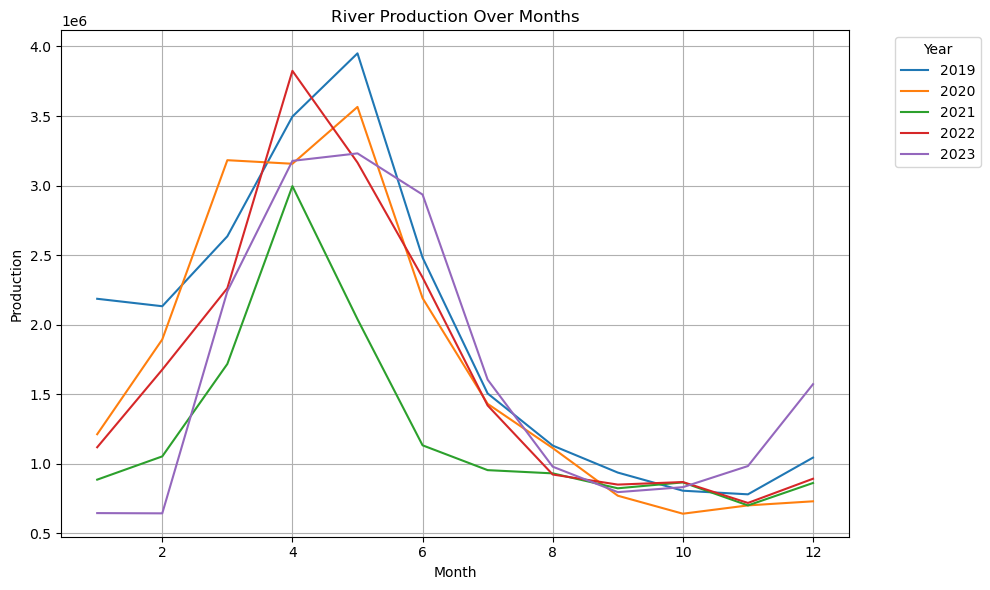

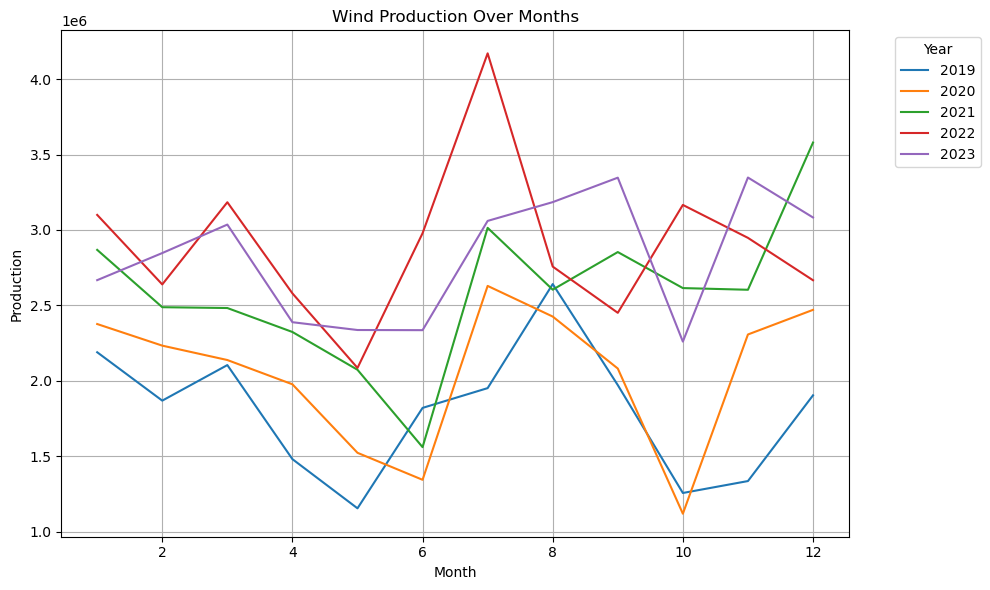

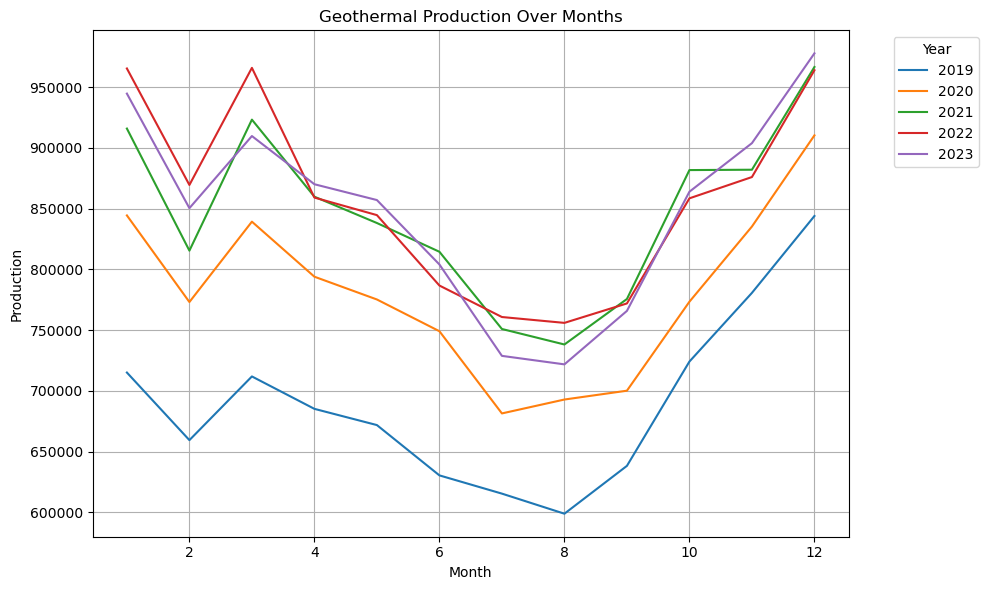

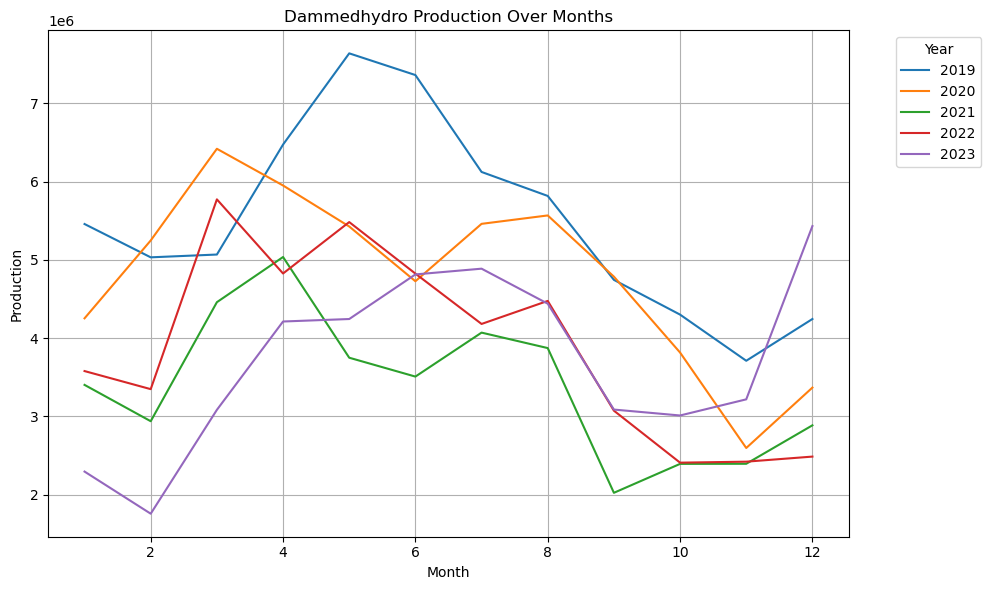

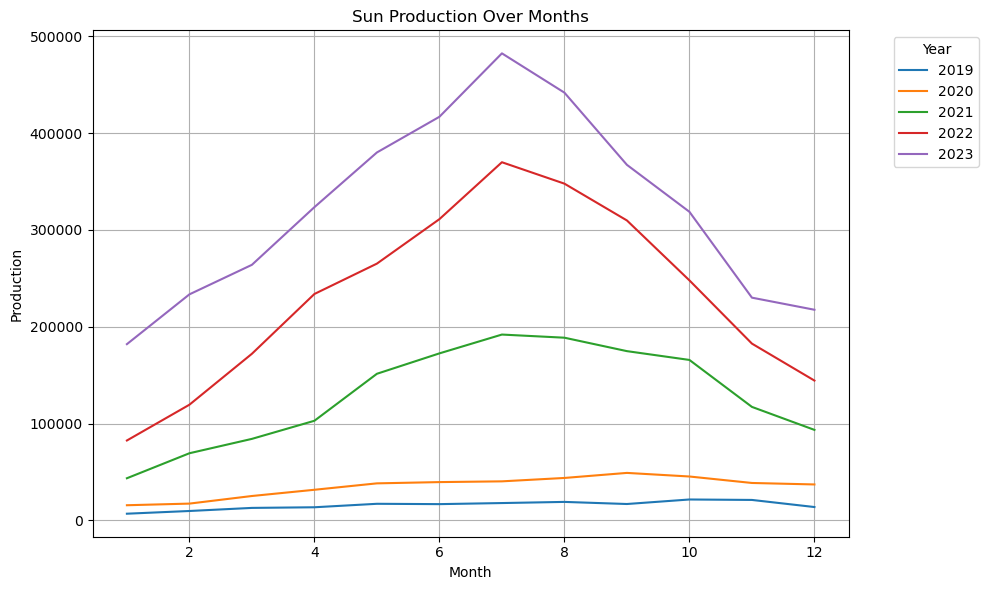

In [59]:
energy_sources = ['river', 'wind', 'geothermal', 'dammedHydro', 'sun']

# Plotting each energy source separately
for source in energy_sources:
    plt.figure(figsize=(10, 6))
    plt.title(f'{source.capitalize()} Production Over Months')
    plt.xlabel('Month')
    plt.ylabel('Production')
    
    # Plotting each year's production data for the current source
    for year in ren_data3['year'].unique():
        data_year = ren_data3[ren_data3['year'] == year]
        plt.plot(data_year['month'], data_year[source], label=str(year))

    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

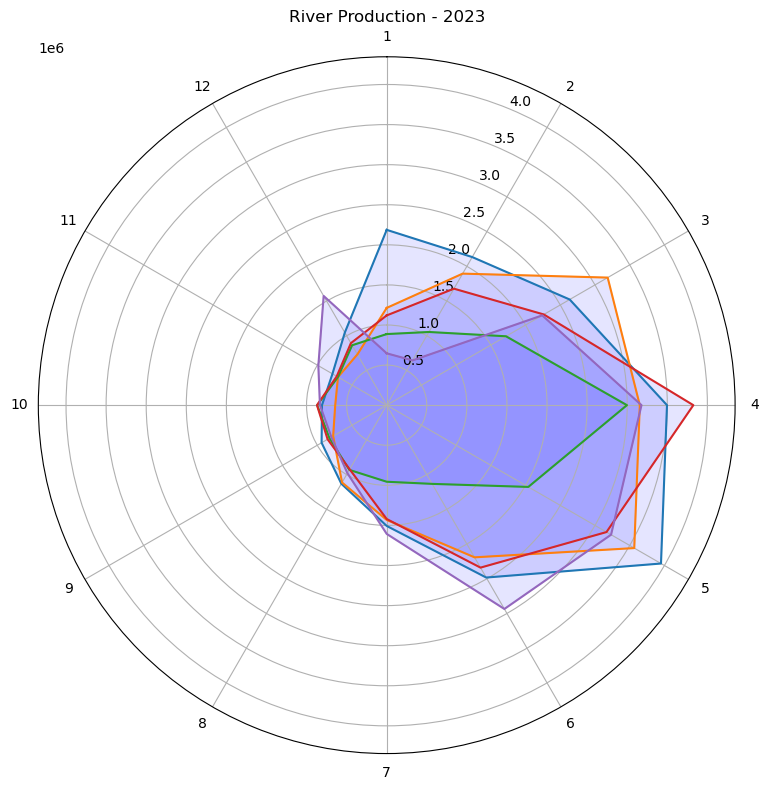

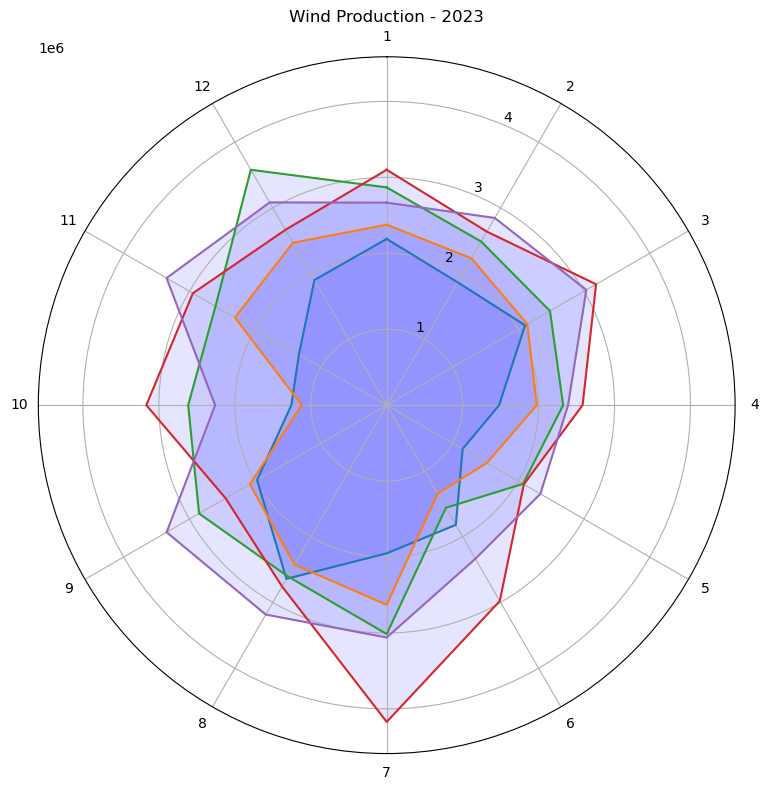

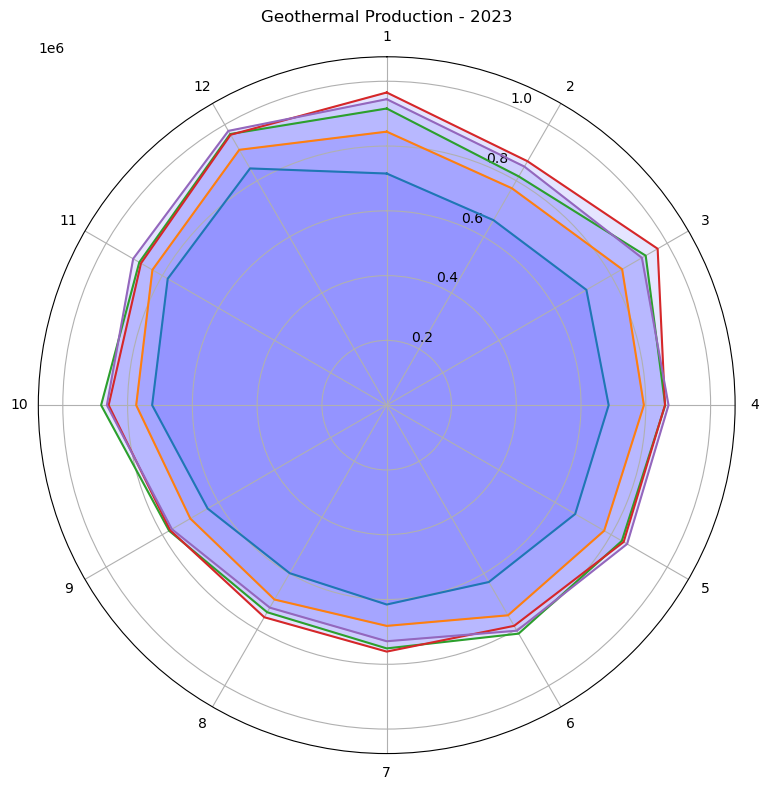

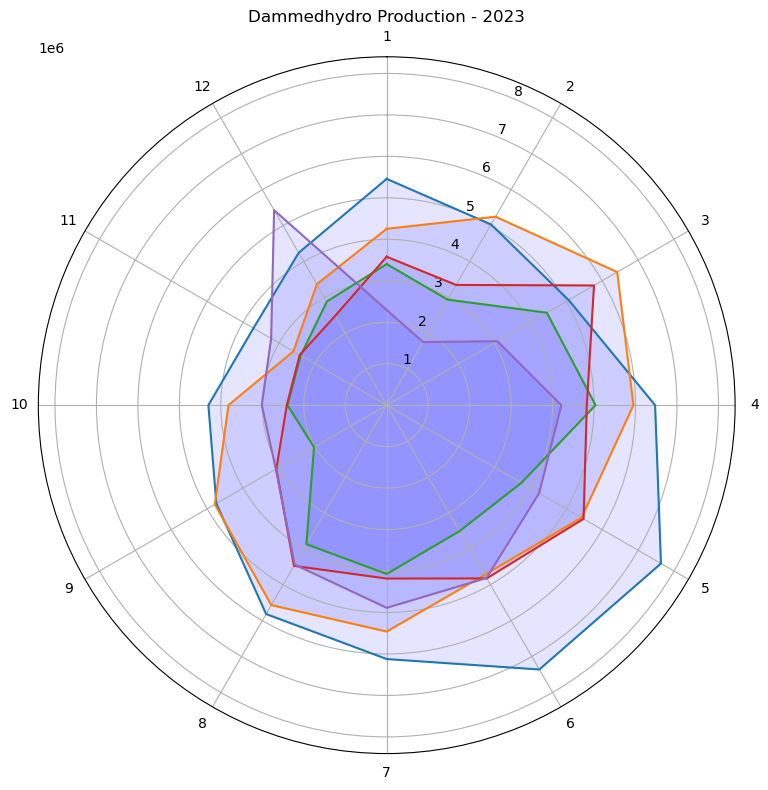

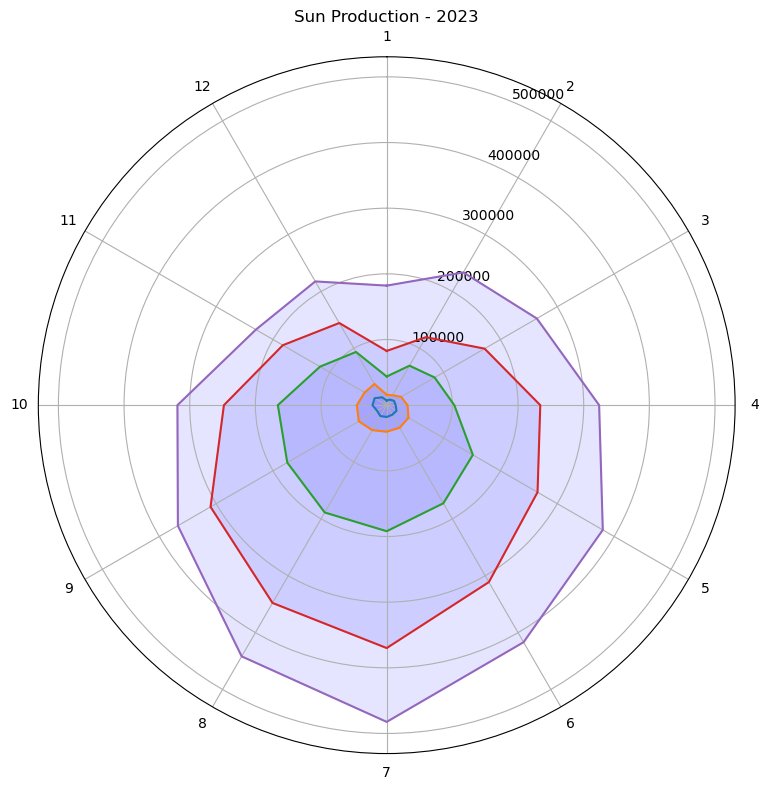

In [61]:

import matplotlib.pyplot as plt
import numpy as np


# Extracting unique sources
energy_sources = ['river', 'wind', 'geothermal', 'dammedHydro', 'sun']

# Function to create radar chart
def create_radar_chart(ax, data, categories, title):
    labels=np.array(categories)
    num_vars = len(categories)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    data = np.concatenate((data,[data[0]]))
    angles += angles[:1]

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], labels)

    ax.plot(angles, data)
    ax.fill(angles, data, color='blue', alpha=0.1)
    ax.set_title(title)

# Plotting each energy source separately
for source in energy_sources:
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.set_ylim(0, ren_data3[source].max() * 1.1)

    # Plotting each year's production data for the current source
    for year in ren_data3['year'].unique():
        data_year = ren_data3[ren_data3['year'] == year]
        data = data_year[source].values.tolist()
        create_radar_chart(ax, data, ren_data3['month'].unique(), f'{source.capitalize()} Production - {year}')

    plt.tight_layout()
    plt.show()


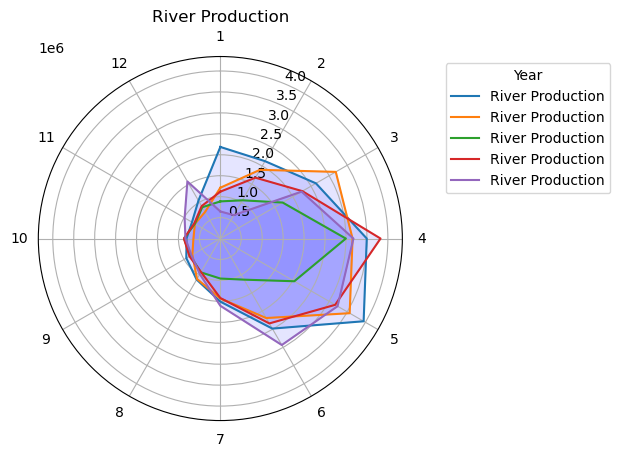

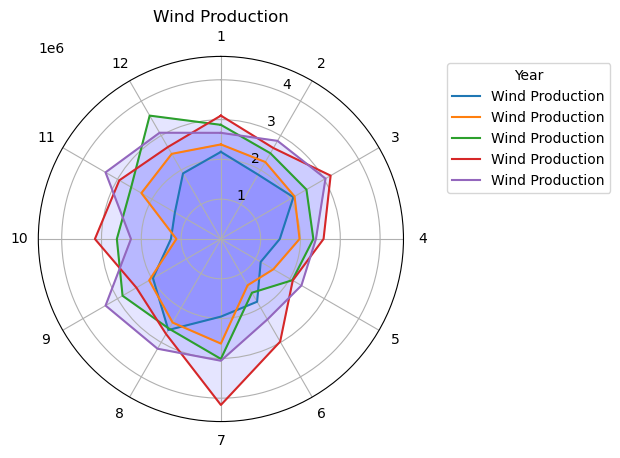

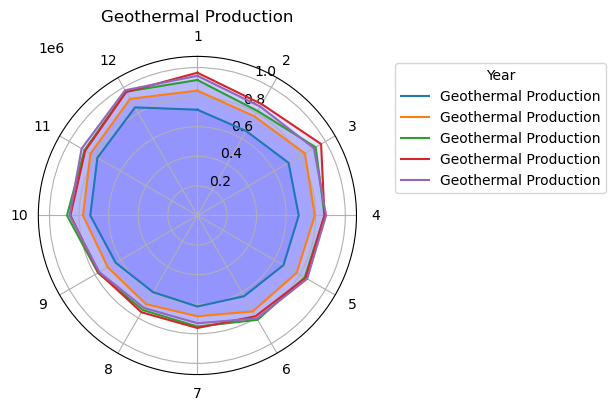

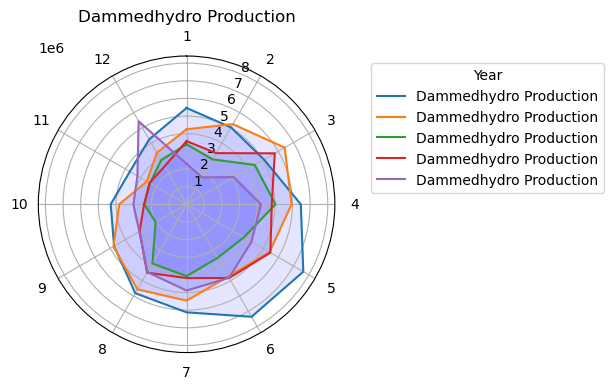

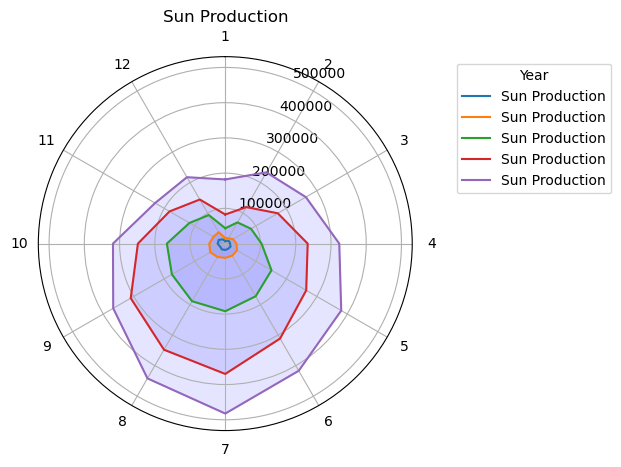

In [62]:
import matplotlib.pyplot as plt
import numpy as np


# Extracting unique sources
energy_sources = ['river', 'wind', 'geothermal', 'dammedHydro', 'sun']

# Function to create radar chart
def create_radar_chart(ax, data, categories, title):
    labels = np.array(categories)
    num_vars = len(categories)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    data = np.concatenate((data,[data[0]]))
    angles += angles[:1]

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], labels)

    ax.plot(angles, data, label=title)
    ax.fill(angles, data, color='blue', alpha=0.1)
    ax.set_title(title)

# Plotting each energy source separately
for source in energy_sources:
    fig, ax = plt.subplots(figsize=(6.4, 6.4), subplot_kw=dict(polar=True))
    ax.set_ylim(0, ren_data3[source].max() * 1.1)

    # Plotting each year's production data for the current source
    for year in ren_data3['year'].unique():
        data_year = ren_data3[ren_data3['year'] == year]
        data = data_year[source].values.tolist()
        create_radar_chart(ax, data, ren_data3['month'].unique(), f'{source.capitalize()} Production')

    ax.legend(title='Year', bbox_to_anchor=(1.1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()